# - - - - - - - - - - - - - - Nanjing 3D road networks --------------------------------

In [1]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import warnings
import itertools
warnings.filterwarnings("ignore")

c:\Users\Administrator\.conda\envs\ox\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Get and plot networks within the bbox from OSMNx, this steps contains the simplification

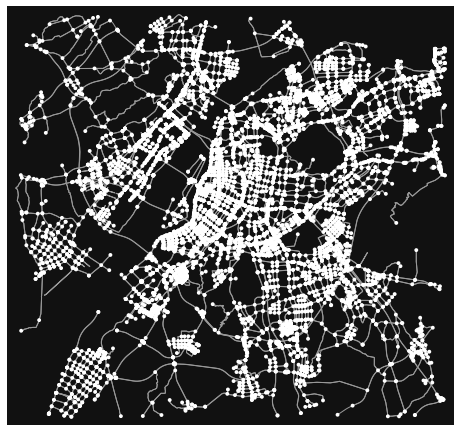

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
cf = '["highway"~"primary|secondary|tertiary|trunk|motorway"]'
G = ox.graph_from_bbox(31.8, 32.2, 119, 118.5, network_type='drive',custom_filter=cf)
ox.plot_graph(G)

## Add node elevation from AW3D30 and calculate the grade

In [3]:
raster_path = "./data/nj_dsm.tif"
G = ox.elevation.add_node_elevations_raster(G, raster_path)
# add edge grades and their absolute values
G = ox.elevation.add_edge_grades(G, add_absolute=True)

In [4]:
dsm_gdf_nodes, dsm_gdf_edges = ox.graph_to_gdfs(G)

In [5]:
dsm_gdf_nodes

,y,x,street_count,elevation,highway,ref,geometry
osmid,,,,,,,
29571639,32.070725,118.767774,4,13.0,NaN,NaN,POINT (118.76777 32.07072)
29571641,32.066769,118.772250,4,14.0,NaN,NaN,POINT (118.77225 32.06677)
32918369,32.060177,118.779046,3,17.0,traffic_signals,NaN,POINT (118.77905 32.06018)
304815377,32.015456,118.792583,3,11.0,NaN,NaN,POINT (118.79258 32.01546)
304815388,31.997392,118.788272,3,16.0,NaN,NaN,POINT (118.78827 31.99739)
...,...,...,...,...,...,...,...
10016235269,32.135482,118.699129,3,10.0,NaN,NaN,POINT (118.69913 32.13548)
10017251495,32.121352,118.691995,4,8.0,NaN,NaN,POINT (118.69199 32.12135)
10017251499,32.121932,118.692175,1,7.0,NaN,NaN,POINT (118.69218 32.12193)


In [6]:
dsm_gdf_edges

osmid  oneway lanes  \
u           v          key                                                    
29571639    4226753211 0                             52458715    True     2   
            3239093497 0                            142846710    True     3   
29571641    3239093499 0                           1059174744   False   NaN   
            778875439  0                             62352731   False   NaN   
            4226753249 0                            142846710    True     3   
...                                                       ...     ...   ...   
10019970966 4225750982 1                            884668173   False     3   
                       2                           1094070270   False     3   
            1157142204 0    [676071129, 775717148, 775717149]   False   NaN   
            9899194418 0    [779232504, 884668173, 779232503]   False     3   
            3302070072 0               [61862481, 1094070269]   False     3   

                            name    highway   length  grade  grade_abs  \
u           v          key                                               
29571639    4226753211 0     山西路  secondary    8.190  0.000      0.000   
            3239093497 0    中山北路    primary  881.043 -0.001      0.001   
29571641    3239093499 0     云南路   tertiary   16.120 -0.062      0.062   
            778875439  0    云南北路   tertiary  608.603  0.013      0.013   
            4226753249 0    中山北路    primary  595.953  0.013      0.013   
...                          ...        ...      ...    ...        ...   
10019970966 4225750982 1     莫愁路  secondary    0.000    NaN        NaN   
                       2     莫愁路  secondary    0.000    NaN        NaN   
            1157142204 0     建邺路  secondary  264.149  0.000      0.000   
            9899194418 0     莫愁路  secondary  600.870  0.000      0.000   
            3302070072 0     莫愁路  secondary  361.563  0.008      0.008   

                                                                     geometry  \
u           v          key                                                      
29571639    4226753211 0    LINESTRING (118.76777 32.07072, 118.76771 32.0...   
            3239093497 0    LINESTRING (118.76777 32.07072, 118.76727 32.0...   
29571641    3239093499 0    LINESTRING (118.77225 32.06677, 118.77212 32.0...   
            778875439  0    LINESTRING (118.77225 32.06677, 118.77348 32.0...   
            4226753249 0    LINESTRING (118.77225 32.06677, 118.76929 32.0...   
...                                                                       ...   
10019970966 4225750982 1    LINESTRING (118.76794 32.03482, 118.76794 32.0...   
                       2    LINESTRING (118.76794 32.03482, 118.76794 32.0...   
            1157142204 0    LINESTRING (118.76794 32.03482, 118.76853 32.0...   
            9899194418 0    LINESTRING (118.76794 32.03482, 118.76836 32.0...   
            3302070072 0    LINESTRING (118.76794 32.03482, 118.76754 32.0...   

                           junction bridge maxspeed  ref tunnel service access  
u           v          key                                                      
29571639    4226753211 0        NaN    NaN      NaN  NaN    NaN     NaN    NaN  
            3239093497 0        NaN    NaN      NaN  NaN    NaN     NaN    NaN  
29571641    3239093499 0        NaN    NaN      NaN  NaN    NaN     NaN    NaN  
            778875439  0        NaN    NaN      NaN  NaN    NaN     NaN    NaN  
            4226753249 0        NaN    NaN      NaN  NaN    NaN     NaN    NaN  
...                             ...    ...      ...  ...    ...     ...    ...  
10019970966 4225750982 1        NaN    NaN      NaN  NaN    NaN     NaN    NaN  
                       2        NaN    yes      NaN  NaN    NaN     NaN    NaN  
            1157142204 0        NaN    yes      NaN  NaN    NaN     NaN    NaN  
            9899194418 0        NaN    yes      NaN  NaN    NaN     NaN    NaN  
            3302070072 0        NaN    

## Add node elevation from FABDEM and calculate the grade

In [7]:
raster_path = ["./data/N32E118_FABDEM.tif","./data/N31E118_FABDEM.tif"]
G_1 = ox.graph_from_bbox(31.8, 32.2, 119, 118.5, network_type='drive',custom_filter=cf)
G_DEM = ox.elevation.add_node_elevations_raster(G_1, raster_path)
# add edge grades and their absolute values
G_DEM = ox.elevation.add_edge_grades(G_DEM, add_absolute=True)

In [8]:
dem_gdf_nodes, dem_gdf_edges = ox.graph_to_gdfs(G_DEM)

In [9]:
_dem_gdf_edges = dem_gdf_edges.copy()
del _dem_gdf_edges['geometry']
_dem_gdf_edges = _dem_gdf_edges.add_suffix('_dem')

In [10]:
_dem_gdf_edges

osmid_dem  oneway_dem  \
u           v          key                                                  
29571639    4226753211 0                             52458715        True   
            3239093497 0                            142846710        True   
29571641    3239093499 0                           1059174744       False   
            778875439  0                             62352731       False   
            4226753249 0                            142846710        True   
...                                                       ...         ...   
10019970966 4225750982 1                            884668173       False   
                       2                           1094070270       False   
            1157142204 0    [676071129, 775717148, 775717149]       False   
            9899194418 0    [779232504, 884668173, 779232503]       False   
            3302070072 0               [61862481, 1094070269]       False   

                           lanes_dem name_dem highway_dem  length_dem  \
u           v          key                                              
29571639    4226753211 0           2      山西路   secondary       8.190   
            3239093497 0           3     中山北路     primary     881.043   
29571641    3239093499 0         NaN      云南路    tertiary      16.120   
            778875439  0         NaN     云南北路    tertiary     608.603   
            4226753249 0           3     中山北路     primary     595.953   
...                              ...      ...         ...         ...   
10019970966 4225750982 1           3      莫愁路   secondary       0.000   
                       2           3      莫愁路   secondary       0.000   
            1157142204 0         NaN      建邺路   secondary     264.149   
            9899194418 0           3      莫愁路   secondary     600.870   
            3302070072 0           3      莫愁路   secondary     361.563   

                            grade_dem  grade_abs_dem junction_dem bridge_dem  \
u           v          key                                                     
29571639    4226753211 0        0.125          0.125          NaN        NaN   
            3239093497 0       -0.000          0.000          NaN        NaN   
29571641    3239093499 0        0.000          0.000          NaN        NaN   
            778875439  0       -0.002          0.002          NaN        NaN   
            4226753249 0       -0.003          0.003          NaN        NaN   
...                               ...            ...          ...        ...   
10019970966 4225750982 1          NaN            NaN          NaN        NaN   
                       2          NaN            NaN          NaN        yes   
            1157142204 0       -0.000          0.000          NaN        yes   
            9899194418 0        0.003          0.003          NaN        yes   
            3302070072 0       -0.004          0.004          NaN        NaN   

                           maxspeed_dem ref_dem tunnel_dem service_dem  \
u           v          key                                               
29571639    4226753211 0            NaN     NaN        NaN         NaN   
            3239093497 0            NaN     NaN        NaN         NaN   
29571641    3239093499 0            NaN     NaN        NaN         NaN   
            778875439  0            NaN     NaN        NaN         NaN   
            4226753249 0            NaN     NaN        NaN         NaN   
...                                 ...     ...        ...         ...   
10019970966 4225750982 1            NaN     NaN        NaN         NaN   
                       2            NaN     NaN        NaN         NaN   
            1157142204 0            NaN     NaN        NaN         NaN   
            9899194418 0            NaN     NaN        NaN         NaN   
            3302070072 0            NaN     NaN        NaN         NaN   

                           access_dem  
u           v          key             
29571639    4226

In [11]:
dem_gdf_nodes

,y,x,street_count,elevation,highway,ref,geometry
osmid,,,,,,,
29571639,32.070725,118.767774,4,9.49,NaN,NaN,POINT (118.76777 32.07072)
29571641,32.066769,118.772250,4,12.24,NaN,NaN,POINT (118.77225 32.06677)
32918369,32.060177,118.779046,3,14.65,traffic_signals,NaN,POINT (118.77905 32.06018)
304815377,32.015456,118.792583,3,3.00,NaN,NaN,POINT (118.79258 32.01546)
304815388,31.997392,118.788272,3,12.28,NaN,NaN,POINT (118.78827 31.99739)
...,...,...,...,...,...,...,...
10016235269,32.135482,118.699129,3,7.57,NaN,NaN,POINT (118.69913 32.13548)
10017251495,32.121352,118.691995,4,5.17,NaN,NaN,POINT (118.69199 32.12135)
10017251499,32.121932,118.692175,1,4.75,NaN,NaN,POINT (118.69218 32.12193)


In [12]:
concat_gdf_edges = pd.concat([dsm_gdf_edges,_dem_gdf_edges],axis=1)

## Find the edges with excessive grades in the DSM graph than the DEM graph

In [13]:
higher_grade_edges = concat_gdf_edges[concat_gdf_edges["grade_abs"]>concat_gdf_edges["grade_abs_dem"]]

In [14]:
modify_nodes = {}
modify_nodes_stat = {}

## Correct

In [15]:
def push_modify_nodes(node_id,node_elevation):
    if modify_nodes.__contains__(node_id):   
        modify_nodes[node_id].append(node_elevation)
    else:
        modify_nodes[node_id] = [node_elevation]

In [16]:
def modify_node(u_node_id,v_node_id,length,taget_grades):
    u_diff = G.nodes[u_node_id]["elevation"] - G_DEM.nodes[u_node_id]["elevation"]
    v_diff = G.nodes[v_node_id]["elevation"] - G_DEM.nodes[v_node_id]["elevation"]
    if u_diff > 0 and v_diff > 0:
        if u_diff < v_diff:
            push_modify_nodes(v_node_id,G.nodes[u_node_id]["elevation"] + length * taget_grades)
        else:
            push_modify_nodes(u_node_id,G.nodes[v_node_id]["elevation"] + length * taget_grades)
    elif u_diff < 0 and v_diff < 0:
        push_modify_nodes(v_node_id,G_DEM.nodes[v_node_id]["elevation"])
        push_modify_nodes(u_node_id,G_DEM.nodes[u_node_id]["elevation"])
    else:
        if u_diff > 0:
            push_modify_nodes(v_node_id,G.nodes[u_node_id]["elevation"] + length * taget_grades)
        else:
            push_modify_nodes(u_node_id,G.nodes[v_node_id]["elevation"] + length * taget_grades)

In [17]:
for index,row in higher_grade_edges.iterrows():
    if "link" not in row["highway"]:
        modify_node(index[0],index[1],row["length"],row["grade_abs_dem"])

In [18]:
for key, value in modify_nodes.items():
    modify_nodes_stat[key] = {"mean":np.mean(value),"std":np.std(value),"max":np.max(value),"min":np.min(value),"median":np.median(value)}

In [19]:
def get_min_mean_group_var(arr):
    combinations = []
    for i in range(2,len(arr)+1):
        iter = itertools.combinations(arr,i)
        combinations.append(list(iter))
    std = np.std(arr)
    min_group = arr
    for item in combinations:
        if np.std(item)<=std:
            std = np.std(item)
            min_group = item
    return {"mean":np.mean(min_group),"std":np.std(min_group),"max":np.max(min_group),"min":np.min(min_group),"mean_group":min_group}
        

In [20]:
for key, value in modify_nodes.items():
    get_min_mean_group_var(value)["mean"]

### Update Node elevation

In [21]:
# 避免重复隧道处理
for node in G.nodes:
    G.nodes[node]["istunnel"] = False 
    G.nodes[node]["isbridge"] = False

In [22]:
for key, value in modify_nodes.items():
    attrs = {key: {"elevation": get_min_mean_group_var(value)["mean"]} }
    nx.set_node_attributes(G, attrs)

## Tunnel Correction

In [23]:
tunnel_height = 4.5
for edge in G.edges:
    u = edge[0]
    v = edge[1]
    if G.edges[u,v,edge[2]].__contains__("tunnel"):
        if G.edges[u,v,edge[2]]["tunnel"] == "yes" and G.nodes[u]["istunnel"] == False and G.nodes[v]["istunnel"] == False:
            G.nodes[u]["istunnel"] = True
            G.nodes[v]["istunnel"] = True
            G.nodes[u]["elevation"] = G.nodes[u]["elevation"] - tunnel_height
            G.nodes[v]["elevation"] = G.nodes[v]["elevation"] - tunnel_height

## Add the node elevation to edges

In [24]:
for edge in G.edges:
    u = edge[0]
    v = edge[1]
    attrs = {edge: {"ele_u": G.nodes[u]["elevation"],"ele_v": G.nodes[v]["elevation"]}}
    nx.set_edge_attributes(G, attrs)

## Recalculate the grades

In [25]:
G = ox.elevation.add_edge_grades(G, add_absolute=True)

## Grades correction for fixing the edges with absolute grades that are more than 0.07

In [26]:
for edge in G.edges:
    u = edge[0]
    v = edge[1]
    if G.edges[edge]["grade_abs"]>0.07:
        u_ele = G.nodes[u]["elevation"]
        v_ele = G.nodes[v]["elevation"]
        # 高值节点降低
        ## TODO: 修改的节点其连接的所有边的高度都需要修改
        if u_ele>v_ele:        
            G.nodes[u]["elevation"] = G.nodes[v]["elevation"]
            G.edges[edge]["ele_u"] = G.nodes[u]["elevation"]
            # G = ox.elevation.add_edge_grades(G, add_absolute=True)
        else:
            G.nodes[v]["elevation"] = G.nodes[u]["elevation"]
            G.edges[edge]["ele_v"] = G.nodes[v]["elevation"]  
            # G = ox.elevation.add_edge_grades(G, add_absolute=True)
 

## Add the node elevation to edges

In [27]:
for edge in G.edges:
    u = edge[0]
    v = edge[1]
    attrs = {edge: {"ele_u": G.nodes[u]["elevation"],"ele_v": G.nodes[v]["elevation"]}}
    nx.set_edge_attributes(G, attrs)

In [28]:
G = ox.elevation.add_edge_grades(G, add_absolute=True)

## Save the result

In [29]:
ox.save_graph_shapefile(G,"NanJing_Result")